# Exploratory Data Analysis - Task 3 - Case Yara

## Question: 
> The VP of Commercial Excellence Americas, the loyalty program’s sponsor, requested the analytics team to evaluate the program’s success by comparing loyalty to non-loyalty farmers. Are loyalty users different from regular users in relation to the main KPIs, app utilization and churn? Another important aspect is to understand if there are any BUs being more successful in acquiring and maintaining users in our digital tools. Create a 10-15 min presentation, bearing in mind she is not familiarized with technical data analysis terms. Please feel free to suggest data driven action plans. 

### KPIs to keep in mind
- **Active users**: users that have used the app at least once in the last 12-rolling months. If last event is earlier than that, the user is considered to have churned. 
- **Active fields**: non-archived fields belonging to active users. 
- **Active hectares**: field area belonging to active fields. 

### Steps to follow in the analysis
1. [Data Preparation:](#1.-Data-Preparation) 
   1. Load Dataset to Pandas;
   2. Clean the data by handling missing values, inconsistencies or outliers, if necessary;
   3. Create a new column to identify active users;
2. [Compare Loyalty vs. Non-Loyalty users:](#2.-Compare-Loyalty-vs.-Non-Loyalty-users)
   1. Split the dataset into loyalty users and non-loyalty users based on the loyalty column;
   2. Calculate and compare the main KPIs (active users, active fields, active hectares) between loyalty users and non-loyalty users;
3. [Analyze app utilization:](#3.-Analyze-app-utilization)
   1. Explore the app utilization metrics for loyalty users and non-loyalty users, such as `recommendation_generated`, `map_created`, and `monitoring_events`;
   2. Calculate and compare the average utilization of these app features between the two user groups;
4. [Analyze churn:](#4.-Analyze-churn)
   1. Identify churned users using the active users column created;
   2. Calculate the churn rate for loyalty users and non-loyalty users;
   3. Compare the churn rates between the two user groups;
   4. Consider using additional factors like user engagement metrics to understand the reasons for churn;
5. [Evaluate Business Unit Performance:](#5.-Evaluate-Business-Unit-Performance)
   1. Group the data by Business Unit using the `bu_name` column;
   2. Calculate the number of active users, active fields, and active hectares for each BU;
   3. Identify the BUs that have the highest acquisition and retention rates of users in the digital tools;
6. [Summarize and Present Findings:](#6.-Summarize-and-Present-Findings)
   1. Summarize the key findings and insights from the analysis;



## 1. Data Preparation

In [1]:
import pandas as pd
import sys 
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('../python/function')
from data_cleaning_and_processing import data_cleaning_and_processing
# Set the float format option
pd.options.display.float_format = '{:.2f}'.format

# Set option for pandas to display all the columns
pd.set_option('display.max_columns', None)

# set configurations for searborn 
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(15,5.27)})

### 1.1. Load Dataset to Pandas

In [2]:
# Load the dataset
case_dataset = data_cleaning_and_processing.prepare_dataset(r"../dataset_provided\agtech_use_case.csv")
case_dataset

,id,user_type,bu_name,loyalty,user_reg_date,last_event_date,days_since_last_visit,recommendation_generated,recommendation_generated_last_date,map_created,map_created_last_date,map_created_last365days,monitoring_events,monitoring_last_date,monitoring_last365days,field_exploring_events,field_exploring_last_date,field_exploring_last365days,n_active_fields,n_fields,n_farms,total_active_field_area,total_field_area,main_crop,state,region
0,1,farmer,NaN,False,2023-07-08,2023-07-08,1,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
1,5,farmer,NaN,False,2023-07-08,2023-07-08,1,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
2,6,farmer,NaN,False,2023-07-08,2023-07-08,1,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
3,7,farmer,NaN,False,2023-07-06,2023-07-08,1,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
4,14,farmer,NaN,False,2023-07-08,2023-07-08,1,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12765,112663,NaN,NaN,False,2021-09-08,2021-09-08,669,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
12766,112676,advisor,NaN,False,2021-09-08,2021-09-08,669,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
12767,112685,advisor,NaN,False,2021-09-07,2021-09-07,670,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
12768,112702,advisor,NaN,False,2021-09-07,2021-09-07,670,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN


### 1.2. Clean the data by handling missing values, inconsistencies or outliers, if necessary

#### Data cleaning steps already performed:
- replaced all occurrences of the dot character `.` with the forward slash character `/` in the `user_reg_date` and `last_event_date`
- converted the values in the `user_reg_date`, `last_event_date`, `recommendation_generated_last_date`, `map_created_last_date`, `monitoring_last_date`, `field_exploring_last_date` columns from a _string_ format to a _datetime_ format
- replaced specific values in the `user_type` column of the `case_dataset` DataFrame
- applied a lambda function to the `loyalty` column of the `case_dataset` DataFrame. If the cell contains `YES`, it is `TRUE`, otherwise it is `FALSE`
- removed any leading whitespace from the values in the `main_crop` column


In [3]:
case_dataset.describe()

,id,user_reg_date,last_event_date,days_since_last_visit,recommendation_generated,recommendation_generated_last_date,map_created,map_created_last_date,map_created_last365days,monitoring_events,monitoring_last_date,monitoring_last365days,field_exploring_events,field_exploring_last_date,field_exploring_last365days,n_active_fields,n_fields,n_farms,total_active_field_area,total_field_area
count,12770.00,12770,12770,12770.00,94.00,94,547.00,547,400.00,1768.00,1768,985.00,1899.00,1899,1122.00,12770.00,12770.00,12770.00,12770.00,3765.00
mean,55160.32,2022-06-05 22:57:38.480814336,2022-07-20 15:41:14.612372992,353.44,1.61,2022-09-07 15:03:49.787234048,3.79,2022-09-13 16:06:08.555758592,3.57,48.81,2022-07-14 17:14:23.348416256,51.81,30.56,2022-08-03 20:54:58.578199040,34.46,3343.45,3.70,0.54,35548.13,122098.51
min,1.00,1922-06-24 00:00:00,2021-09-07 00:00:00,1.00,1.00,2021-10-21 00:00:00,1.00,2021-04-15 00:00:00,1.00,1.00,2019-08-04 00:00:00,1.00,1.00,2021-04-13 00:00:00,1.00,0.00,0.00,0.00,0.00,0.01
25%,28511.75,2021-12-02 00:00:00,2021-12-21 00:00:00,146.00,1.00,2022-06-24 18:00:00,1.00,2022-07-08 00:00:00,1.00,3.00,2022-02-21 00:00:00,4.00,2.00,2022-05-01 12:00:00,3.00,0.00,0.00,0.00,0.00,1.27
50%,53594.00,2022-05-04 00:00:00,2022-07-07 00:00:00,367.00,1.00,2022-08-08 12:00:00,2.00,2022-08-12 00:00:00,1.00,9.50,2022-07-27 00:00:00,12.00,6.00,2022-08-02 00:00:00,9.00,0.00,0.00,0.00,0.00,20.48
75%,82317.00,2023-01-16 00:00:00,2023-02-13 00:00:00,565.00,2.00,2022-11-28 18:00:00,3.00,2022-11-22 12:00:00,3.00,30.00,2022-12-11 06:00:00,36.00,23.00,2022-11-29 00:00:00,30.75,1.00,1.00,1.00,0.20,427.04
max,112711.00,2023-07-08 00:00:00,2025-11-21 00:00:00,670.00,12.00,2023-07-01 00:00:00,127.00,2023-07-08 00:00:00,127.00,5378.00,2023-07-08 00:00:00,5151.00,1176.00,2023-07-08 00:00:00,853.00,27612467.00,5546.00,70.00,193410010.40,193410010.40
std,31910.74,NaN,NaN,218.81,1.53,NaN,9.18,NaN,9.43,207.47,NaN,206.69,84.48,NaN,80.81,263776.63,64.26,2.16,2126758.31,3916933.90


##### Findings

1. There are 12,770 lines in the dataset
2. The first user registered was 1922-06-24 and the last one was 2023-07-08
3. The first last event date was 2021-09-07 and the most recent event date was 2025-11-21. Need to check, since the date is in the future
4. The first recommendation was 2021-10-21 and the last recommendation was 2023-07-01
5. The first map created was 2021-04-15 and the last map created was 2023-07-08
6. The average number of maps created in the last 365 days is 3.5, with the median being 1
7. The average monitoring events is 3.6, minimum is 1 and maximum is 5,378. Need to check, since the volume is way over the average
8. The first monitoring event last date was 2019-08-04 and the last was 2023-07-08
9. The average of monitoring events in the last 365 days is 51.8, minimum is 1 and maximum is 5,151. Need to check, since the volume is way over the average
10. The field exploring events average is 30.5, with minimum 1 and maximum 1,176. Need to check, since the volume is way over the average
11. The first field exploring last date was 2021-04-13 and the last was 2023-07-08
12. The field exploring in the last 365 days average is 34.5, minimum is 1 and maximum is 853
13. The average of active fields is 3,343.45, with minimum and median being 0 and maximum 2,4612,467
14. The average number of fields is 3.7, with minimum and median being 0 and maximum 5,546
15. The average number of farms is 0.54 and maximum is 70
16. The average total active field area is 35,548.13 and maximum is 193,410,010.40
17. The average total field area is 122,098.51 and maximum is 193,410,010.40

In [4]:
print("18. There are {} duplicates in id".format(case_dataset['id'].duplicated().sum()))
print("19. There user types available are {}".format(', '.join(case_dataset['user_type'].drop_duplicates().dropna().to_list())))
print("20. There are {} business units names available for {} lines. There rest are empty".format(case_dataset['bu_name'].drop_duplicates().dropna().count(), case_dataset['bu_name'].dropna().count()))
print("21. There are {} loyalty users and {} are not loyalty users".format(case_dataset.loc[case_dataset.loyalty == True, 'loyalty'].count(), case_dataset.loc[case_dataset.loyalty == False, 'loyalty'].count()))
print("22. Only the loyalty users has business units associated with them")
print("23. There are {} lines with state filled and {} with region filled. Only {} region is filled and doesn't have the state filled.".format(case_dataset.loc[(case_dataset.state.isna() == False), 'state'].count(), case_dataset.loc[(case_dataset.region.isna() == False), 'region'].count(), case_dataset.loc[(case_dataset.state.isna() == True) & (case_dataset.region.isna() == False), 'region'].drop_duplicates().count()))

18. There are 0 duplicates in id
19. There user types available are farmer, advisor
20. There are 128 business units names available for 1192 lines. There rest are empty
21. There are 1192 loyalty users and 11578 are not loyalty users
22. Only the loyalty users has business units associated with them
23. There are 2157 lines with state filled and 2158 with region filled. Only 1 region is filled and doesn't have the state filled.


#### Cleaning by removing outliers and inconsistencies from the data

##### last_event_date

There is one line with an incorrect las event date. This line will be removed from the last event dates


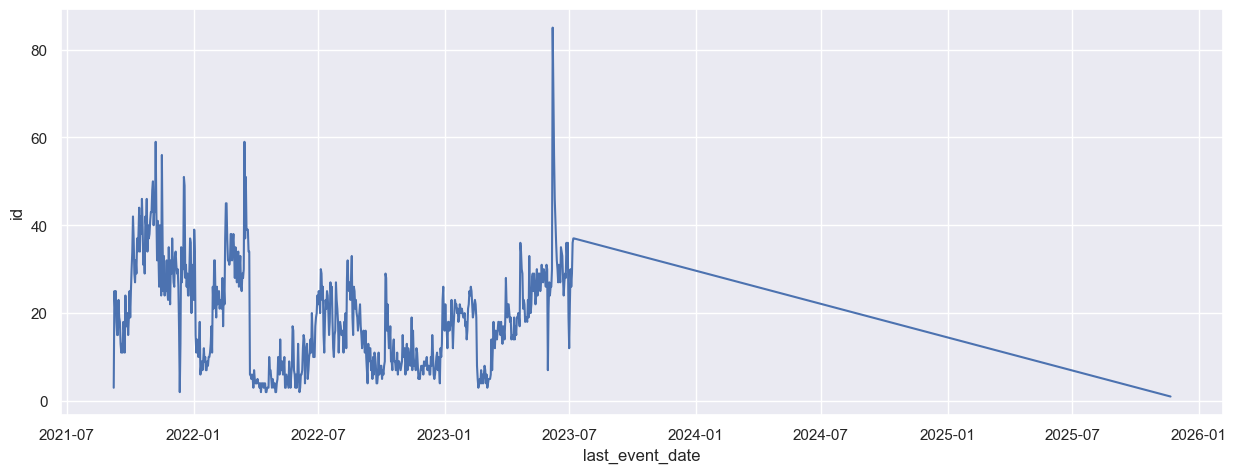

In [5]:
# Plot the graph showing that there is one line with an incorrect las event date. This line will be removed from the dateset.
sns.lineplot(x="last_event_date", y="id", data=case_dataset[['id', 'last_event_date']].groupby('last_event_date').count().reset_index())

print('There is one line with an incorrect las event date. This line will be removed from the last event dates')

<Axes: xlabel='last_event_date', ylabel='id'>

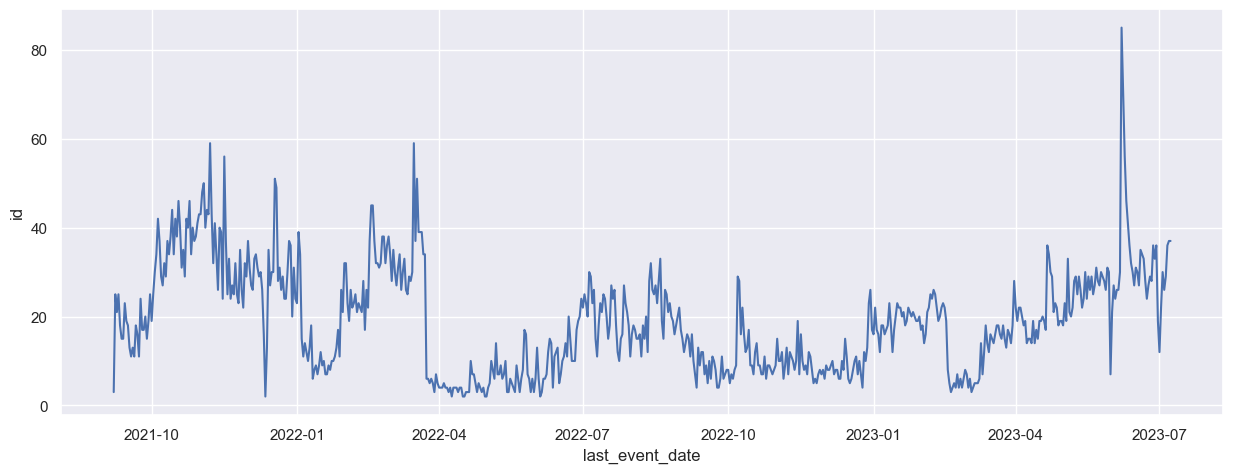

In [6]:
# remove the incorrect line
case_dataset_clean = case_dataset.loc[case_dataset.last_event_date != case_dataset['last_event_date'].max()]

# plot the data again to check if the information is correct
sns.lineplot(x="last_event_date", y="id", data=case_dataset_clean[['id', 'last_event_date']].groupby('last_event_date').count().reset_index()) 

##### monitoring_events

In [7]:
# filter only filled monitoring events
case_monitoring_events_view = case_dataset_clean.loc[case_dataset_clean.monitoring_events.isna() == False, ['monitoring_events']]

# create bins for each range of monitoring events
bins = np.arange(0, case_monitoring_events_view.monitoring_events.max() + 537,537)
case_monitoring_events_view['groups'] = pd.cut(case_monitoring_events_view['monitoring_events'], bins)

print('By the print it is possible to see that the data above 2148 we can consider as outliers. Such Data will be removed.\n')
# view the data grouped by bins 
print(case_monitoring_events_view[['groups', 'monitoring_events']].groupby('groups').count().reset_index())

# adding to the dataset only the data where the monitoring_events column has the value < 2148 or is null 
case_dataset_clean = case_dataset_clean.loc[(case_dataset_clean.monitoring_events < 2148) | (case_dataset_clean.monitoring_events.isna() == True)]

By the print it is possible to see that the data above 2148 we can consider as outliers. Such Data will be removed.

              groups  monitoring_events
0       (0.0, 537.0]               1746
1    (537.0, 1074.0]                 12
2   (1074.0, 1611.0]                  3
3   (1611.0, 2148.0]                  5
4   (2148.0, 2685.0]                  0
5   (2685.0, 3222.0]                  0
6   (3222.0, 3759.0]                  1
7   (3759.0, 4296.0]                  0
8   (4296.0, 4833.0]                  0
9   (4833.0, 5370.0]                  0
10  (5370.0, 5907.0]                  1


##### monitoring_last365days

There is nothing to be cleaned in the column monitoring_last365days since the last step was done.


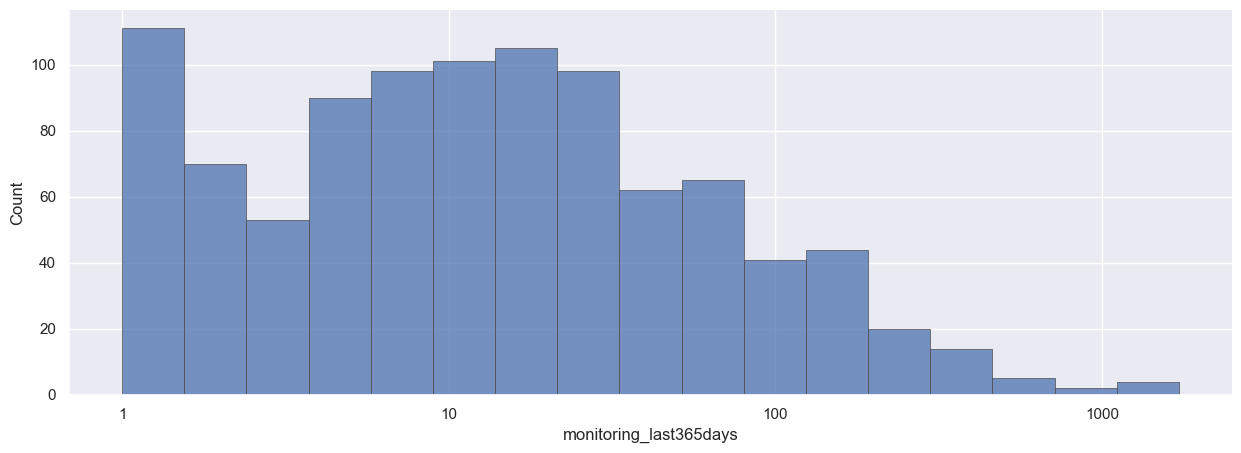

In [10]:
# filter only filled monitoring events
case_monitoring_last365days_view = case_dataset_clean.loc[case_dataset_clean.monitoring_last365days.isna() == False, ['monitoring_last365days']]

f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)

sns.histplot(
    case_monitoring_last365days_view,
    x="monitoring_last365days", 
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

print("There is nothing to be cleaned in the column monitoring_last365days since the last step was done.")

##### field_exploring_events

There is nothing to be cleaned in the column monitoring_last365days since the last step was done.


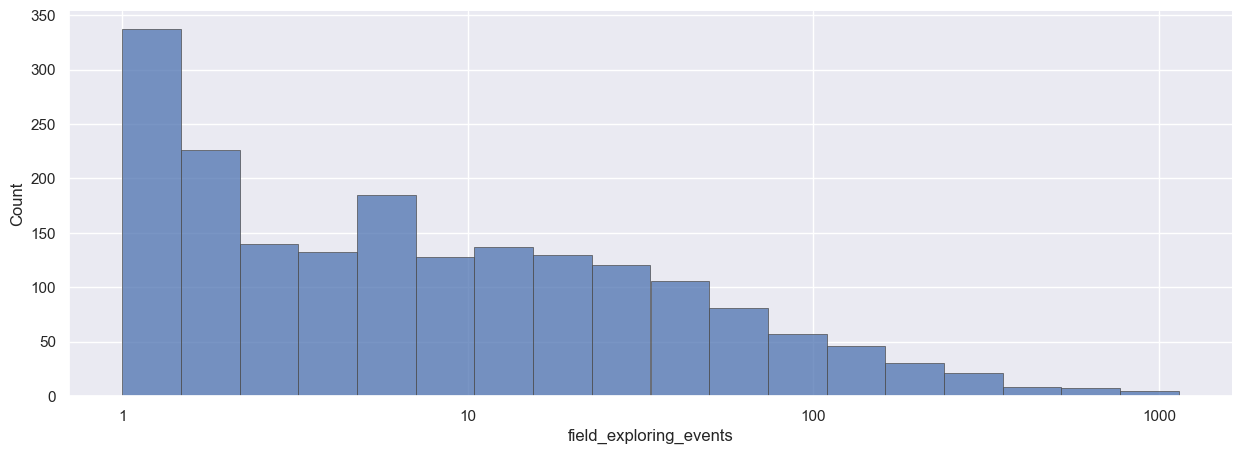

In [11]:
# filter only filled monitoring events
case_field_exploring_events_view = case_dataset_clean.loc[case_dataset_clean.field_exploring_events.isna() == False, ['field_exploring_events']]

f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)

sns.histplot(
    case_field_exploring_events_view,
    x="field_exploring_events", 
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

print("There is nothing to be cleaned in the column field_exploring_events since the last step was done.")

##### n_active_fields

In the boxplot is easy to identify a really large number of outliers. This plot contains 12765 data points.


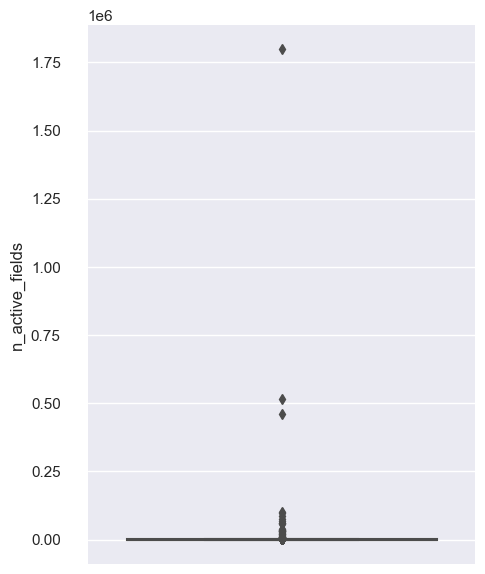

In [76]:
# filter only filled n_active_fields
case_n_active_fields_view = case_dataset_clean.loc[case_dataset_clean.n_active_fields.isna() == False, ['n_active_fields']]

# configure the figure size
sns.set(rc={'figure.figsize':(5,7)})

# plot the boxplot for visualization
sns.boxplot(y="n_active_fields",
            data=case_n_active_fields_view)

sns.despine(offset=10, trim=True)

print('In the boxplot is easy to identify a really large number of outliers. This plot contains {} data points.'.format(case_dataset_clean.loc[case_dataset_clean.n_active_fields.isna() == False, 'n_active_fields'].count()))

We can see that now the data is more closer to each other and we can continue using this data. We removed 21 outliers, so this plot contains 12744 data points.


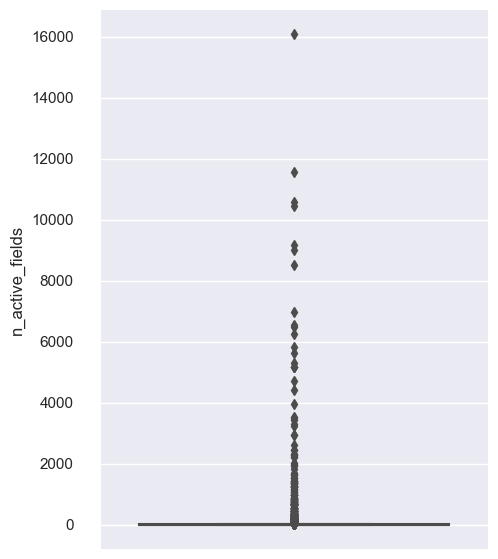

In [85]:
# get mean and standard deviation
mean_value = case_n_active_fields_view['n_active_fields'].mean()
std_value = case_n_active_fields_view['n_active_fields'].std()

# Define outlier threshold as 1 to mitigate the influence of extreme values on the overall distribution
threshold = 1   

# Identify outliers by comparing the absolute difference of each value in the 'n_active_fields' column to the mean with a threshold based on the standard deviation.
outlier_mask = abs(case_n_active_fields_view['n_active_fields'] - mean_value) > (threshold * std_value)

# Remove outliers
df_filtered = case_n_active_fields_view[~outlier_mask]

# Print the filtered DataFrame without outliers
sns.boxplot(y="n_active_fields",
            data=df_filtered)

sns.despine(offset=10, trim=True)

# explanation of what was done and 
print('We can see that now the data is more closer to each other and we can continue using this data. We removed {} outliers, so this plot contains {} data points.'.format(case_n_active_fields_view.loc[outlier_mask, 'n_active_fields'].count(), df_filtered['n_active_fields'].count()))

case_dataset_clean = case_dataset_clean[~outlier_mask]

<Axes: ylabel='total_field_area'>

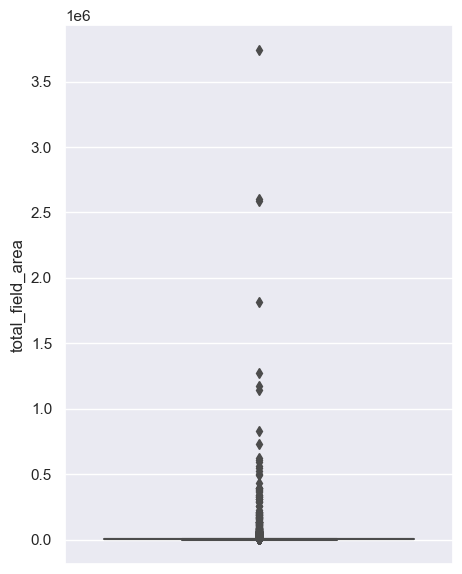

In [86]:
sns.boxplot(y="total_field_area",
            data=case_dataset_clean)

In [23]:
case_dataset.pivot_table(index=case_dataset.columns.to_list(), aggfunc='size')

id     user_type  bu_name  loyalty  user_reg_date  last_event_date  days_since_last_visit  recommendation_generated  recommendation_generated_last_date  map_created  map_created_last_date  map_created_last365days  monitoring_events  monitoring_last_date  monitoring_last365days  field_exploring_events  field_exploring_last_date  field_exploring_last365days  n_active_fields  n_fields  n_farms  total_active_field_area  total_field_area  main_crop     state               region      
418    farmer     CH-ITP   True     2022-12-22     2023-07-07       2                      1.00                      2022-12-22                          1.00         2022-12-22             1.00                     285.00             2023-07-07            285.00                  232.00                  2023-07-07                 232.00                       55743            366       6        739867.01                739975.40         Unknown       São Paulo           Sudeste         1
432    advisor    CC-CVV 

In [22]:


### Active users: users that have used the app at least once in the last 12-rolling months. If last event is earlier than that, the user is considered to have churned.
# Calculate active users
active_users = case_dataset[case_dataset['last_event_date'] >= current_date - pd.DateOffset(years=1)].groupby('user_type')['id'].nunique()

### Active fields: non-archived fields belonging to active users.
# Calculate active fields
active_fields = case_dataset[(case_dataset['last_event_date'] >= current_date - pd.DateOffset(years=1)) & (~case_dataset['n_active_fields'].isnull())].groupby('user_type')['n_active_fields'].sum()

### Active hectares: field area belonging to active fields.
# Calculate active hectares
active_hectares = case_dataset[(case_dataset['last_event_date'] >= current_date - pd.DateOffset(years=1)) & (~case_dataset['total_active_field_area'].isnull())].groupby('user_type')['total_active_field_area'].sum()

['id',
 'user_type',
 'bu_name',
 'loyalty',
 'user_reg_date',
 'last_event_date',
 'days_since_last_visit',
 'recommendation_generated',
 'recommendation_generated_last_date',
 'map_created',
 'map_created_last_date',
 'map_created_last365days',
 'monitoring_events',
 'monitoring_last_date',
 'monitoring_last365days',
 'field_exploring_events',
 'field_exploring_last_date',
 'field_exploring_last365days',
 'n_active_fields',
 'n_fields',
 'n_farms',
 'total_active_field_area',
 'total_field_area',
 'main_crop',
 'state',
 'region']